# Estimating regression fits

## Functions for drawing linear regression models
- The two functions that can be used to visualize a linear fit are regplot() and lmplot().
- In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stat

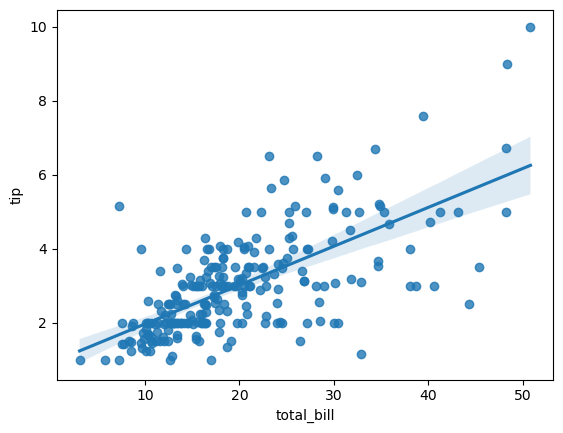

In [2]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips);

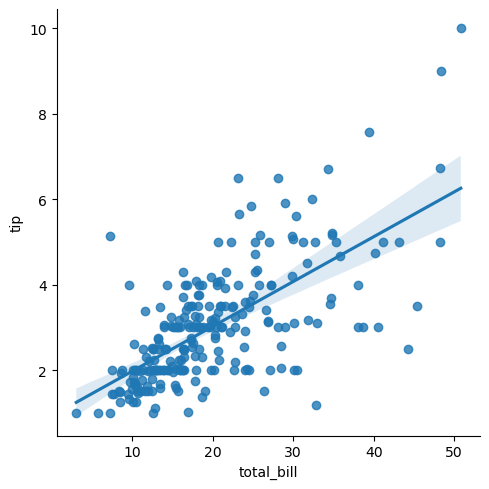

In [3]:
sns.lmplot(x="total_bill", y="tip", data=tips);

- These functions draw similar plots, but regplot() is an axes-level function, and lmplot() is a figure-level function. Additionally, regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas.Series objects, or as references to variables in a pandas.DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. Finally, only lmplot() has hue as a parameter.
- It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

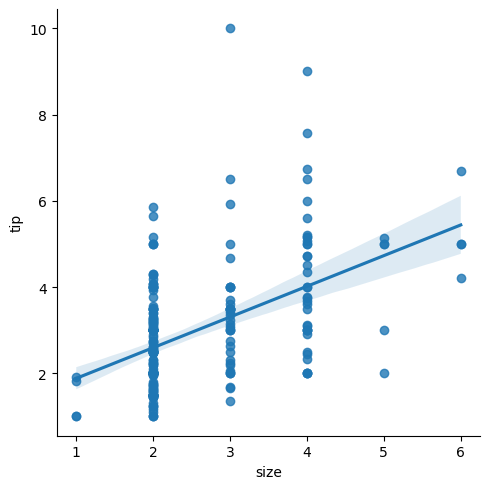

In [4]:
sns.lmplot(x="size", y="tip", data=tips);

- One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

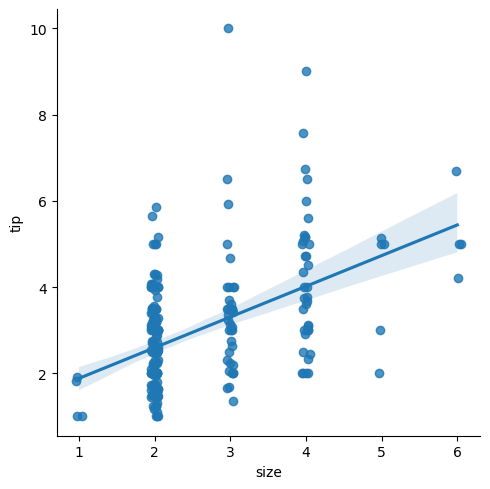

In [5]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

- A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

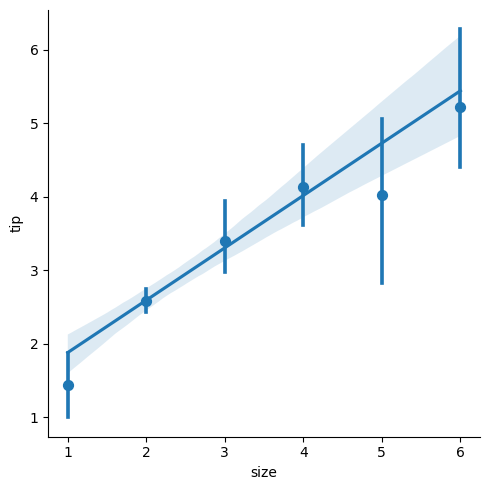

In [6]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## Fitting different kinds of models
- The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The Anscombe’s quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95


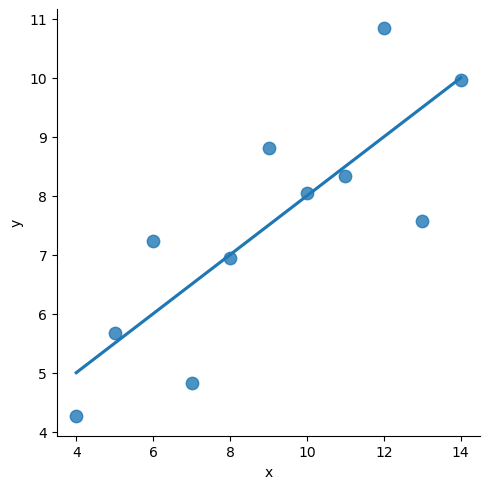

In [7]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});
print(anscombe.head(2))

- The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

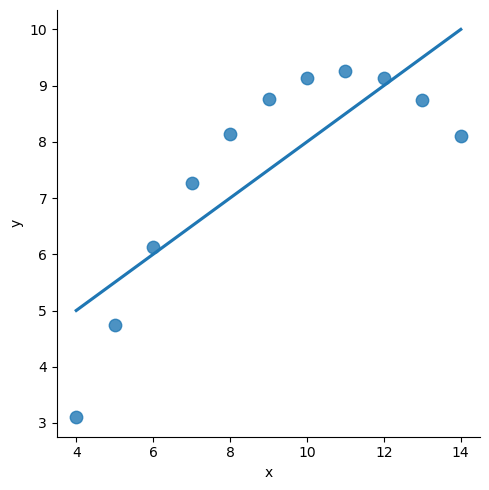

In [8]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

- In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

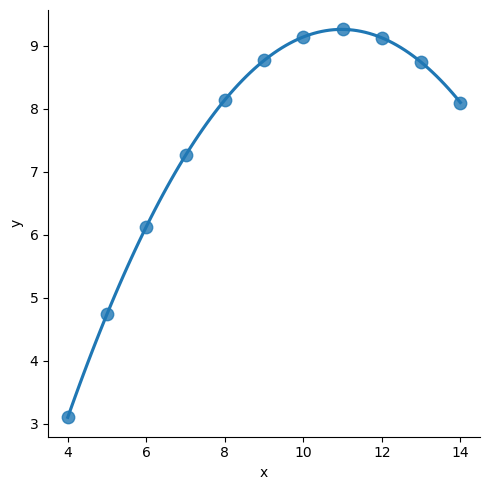

In [9]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

- A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study:

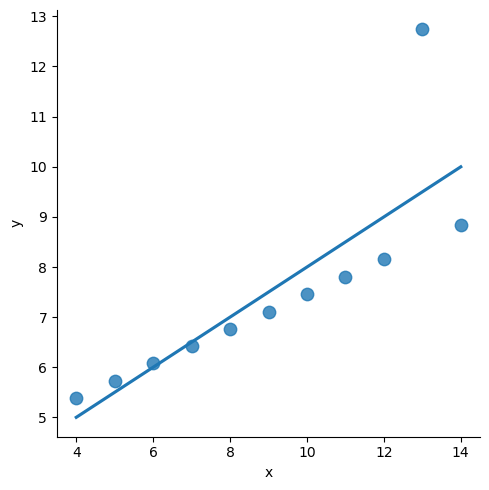

In [10]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

- In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

In [15]:
import statsmodels as sm


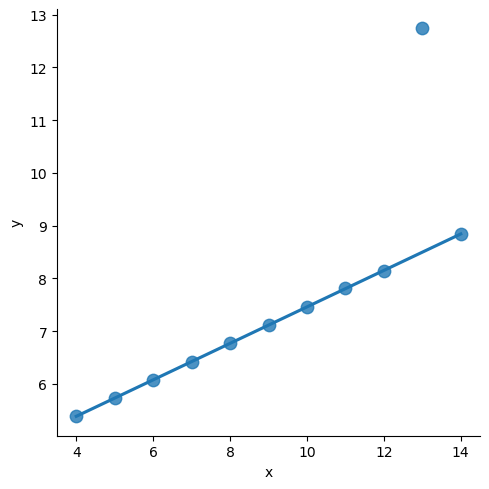

In [16]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

- When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

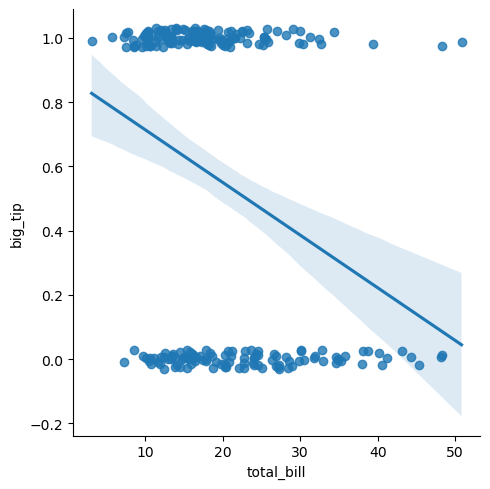

In [17]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

- The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

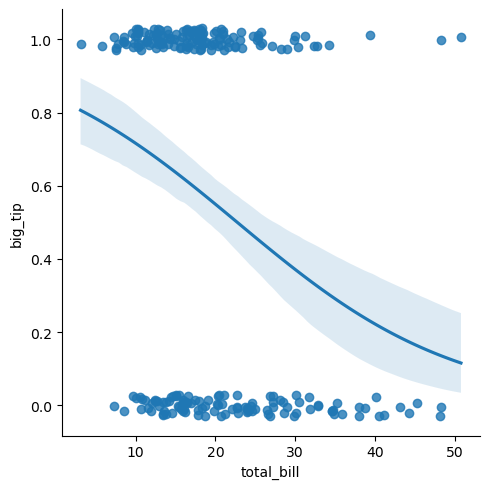

In [18]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

- Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well). As the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ci=None).
- An altogether different approach is to fit a nonparametric regression using a lowess smoother. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:

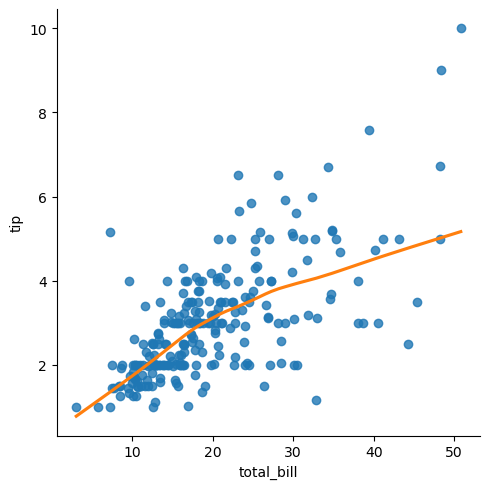

In [19]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True, line_kws={"color": "C1"});

- The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0:

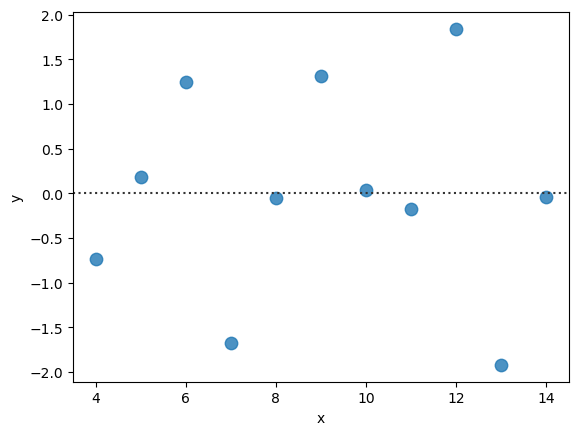

In [20]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

- If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

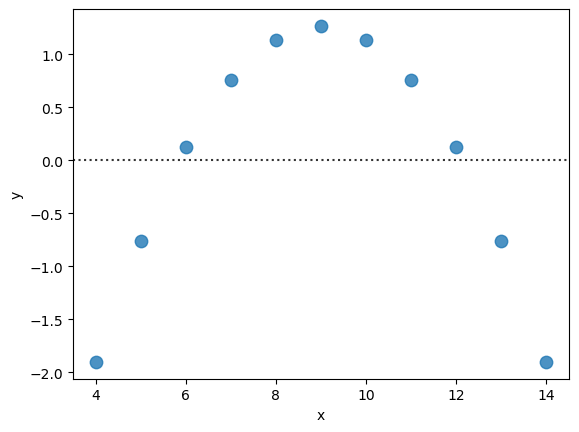

In [21]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## Conditioning on other variables
- The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is “how does the relationship between these two variables change as a function of a third variable?” This is where the main differences between regplot() and lmplot() appear. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to show multiple fits using hue mapping or faceting.
- The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

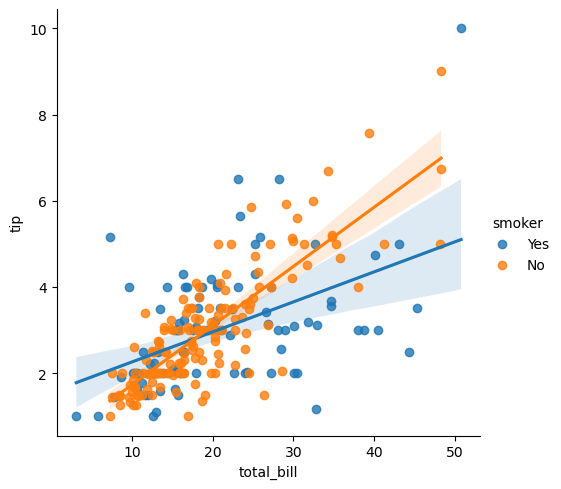

In [22]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

- Unlike relplot(), it’s not possible to map a distinct variable to the style properties of the scatter plot, but you can redundantly code the hue variable with marker shape:

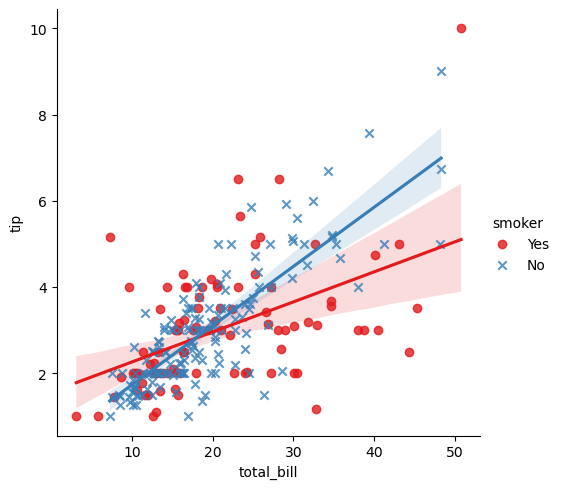

In [23]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

- To add another variable, you can draw multiple “facets” with each level of the variable appearing in the rows or columns of the grid:

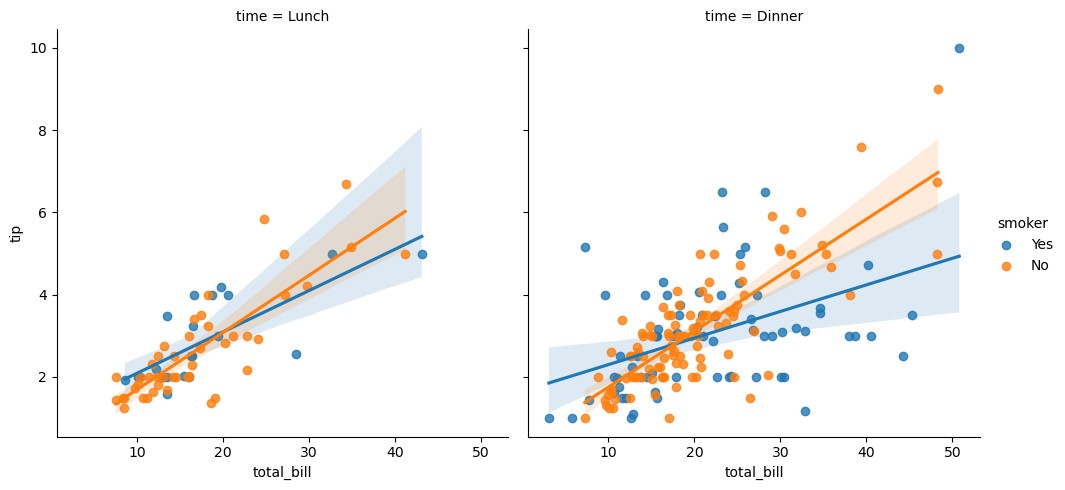

In [24]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

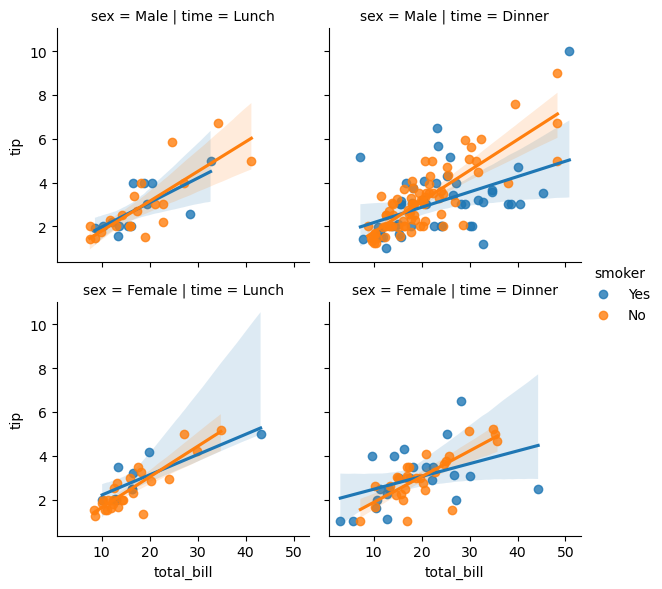

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips, height=3);

## Plotting a regression in other contexts
- A few other seaborn functions use regplot() in the context of a larger, more complex plot. The first is the jointplot() function that we introduced in the distributions tutorial. In addition to the plot styles previously discussed, jointplot() can use regplot() to show the linear regression fit on the joint axes by passing kind="reg":

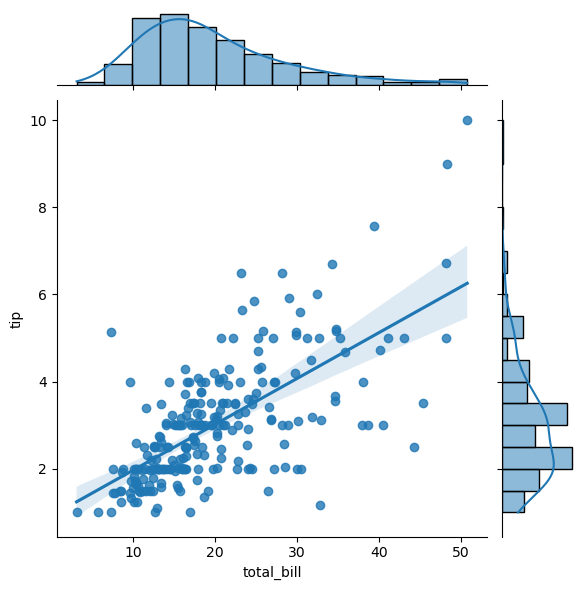

In [26]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

- Using the pairplot() function with kind="reg" combines regplot() and PairGrid to show the linear relationship between variables in a dataset. Take care to note how this is different from lmplot(). In the figure below, the two axes don’t show the same relationship conditioned on two levels of a third variable; rather, PairGrid() is used to show multiple relationships between different pairings of the variables in a dataset:

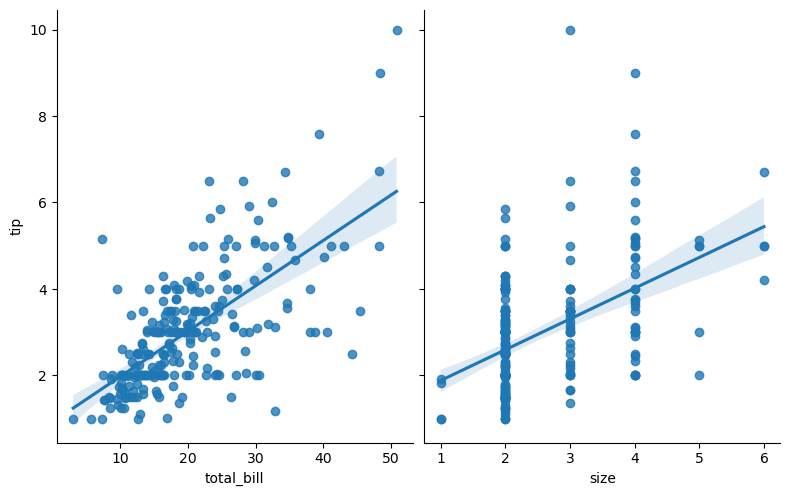

In [27]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

- Conditioning on an additional categorical variable is built into both of these functions using the hue parameter:

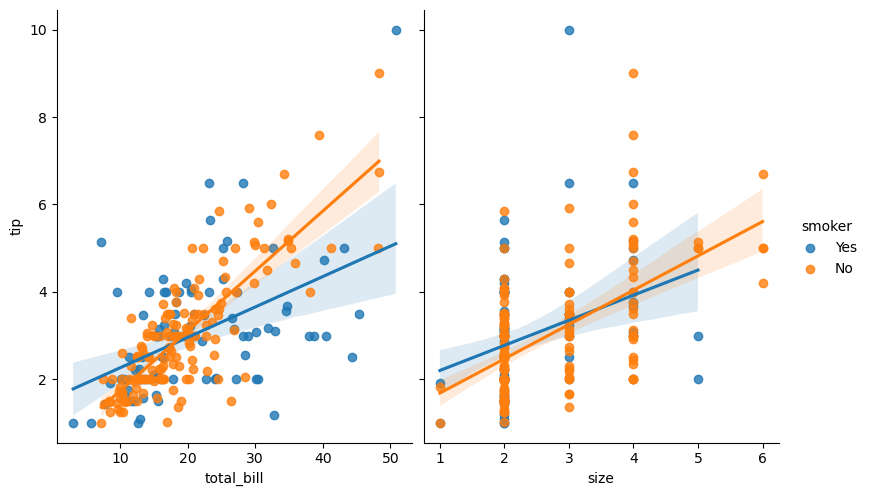

In [28]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");